In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [5]:
train = train_df[['Open']]

In [6]:
train

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(train)

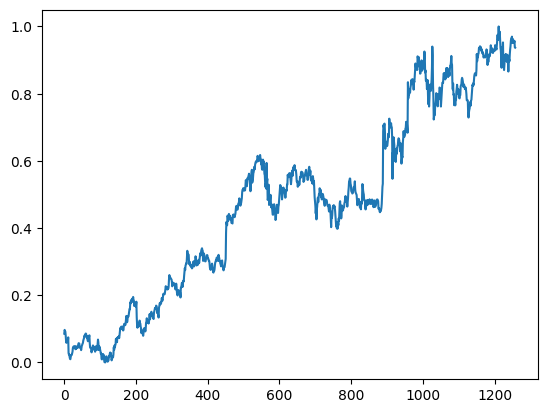

In [8]:
plt.plot(train_scale)

In [9]:
x_train = []
y_train =[]
time = 60

for i in range(60,train_scale.shape[0]):
    x_train.append(train_scale[i-60:i,0])
    y_train.append(train_scale[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)
                   

In [10]:
x_train.shape

(1198, 60)

In [11]:
x_train = np.reshape(x_train,newshape=(1198,60,1))
x_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN

In [20]:
model = Sequential()

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
          
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))       
model.add(Dropout(0.2))
          
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
          
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam',loss='mse')

In [22]:
model.fit(x_train,y_train,epochs=2,batch_size=20,validation_split=0.05)

Epoch 1/2
57/57 [==============================] - 4s 35ms/step - loss: 0.3360 - val_loss: 0.0201
Epoch 2/2
57/57 [==============================] - 2s 29ms/step - loss: 0.2072 - val_loss: 9.4091e-04


In [23]:
data = pd.concat((train_df['Open'],test_df['Open']),axis = 0)

In [25]:
input_test = data.iloc[len(data) - len(test_df) - 60:].values

In [26]:
input_test = input_test.reshape(-1,1)

In [27]:
input_test.shape


(80, 1)

In [29]:
test_scale = scaler.fit_transform(input_test)

In [32]:
x_test = []
for i in range(60,test_scale.shape[0]):
    x_test.append(test_scale[i-60:i,0])
    
x_test = np.array(x_test)

In [33]:
x_test.shape

(20, 60)

In [34]:
x_test = np.reshape(x_test,newshape=(20,60,1))

In [35]:
x_test.shape

(20, 60, 1)

In [36]:
y_test = test_df[['Open']]

In [37]:
y_pred = model.predict(x_test)

In [39]:
y_pred = scaler.inverse_transform(y_pred)

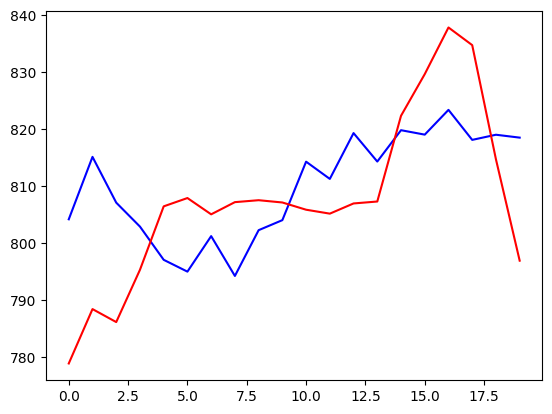

In [40]:
plt.plot(y_pred,color='blue',label='predicted')
plt.plot(y_test,color='red',label = 'actual')